In [1]:
# 虽然看起来很奇怪，我们的训练集和测试集都是5717个图像，你可能会怀疑这俩不会是完全一样的吧？
# 但是他们真的是完全独立的，不信你看：
val_path = r"data\coco\VOCtrainval_11-May-2012\VOCdevkit\VOC2012\ImageSets\Main\val.txt"
with open(val_path) as f:
    val = f.read().split()
train_path = r"data\coco\VOCtrainval_11-May-2012\VOCdevkit\VOC2012\ImageSets\Main\train.txt"
with open(train_path) as f:
    train = f.read().split()
all(i not in val for i in train)

True

### 实验结果

In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
!cat work_dirs/mask-rcnn_r50_fpn_1x_voc/20250522_094013/vis_data/20250522_094013.json

'cat' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


#### loss曲线（读取mmdetection的训练日志）

##### MASK R-CNN

In [7]:
scalars = []
with open('./work_dirs/mask-rcnn_r50_fpn_1x_voc/20250522_094013/vis_data/scalars.json') as f:
    while True:
        line = f.readline()
        if line:
            scalars.append(json.loads(line))
        else:
            break

In [8]:
df = pd.DataFrame(scalars)
df.head(2)

,lr,data_time,loss,loss_rpn_cls,loss_rpn_bbox,loss_cls,acc,loss_bbox,loss_mask,time,...,coco/bbox_mAP_75,coco/bbox_mAP_s,coco/bbox_mAP_m,coco/bbox_mAP_l,coco/segm_mAP,coco/segm_mAP_50,coco/segm_mAP_75,coco/segm_mAP_s,coco/segm_mAP_m,coco/segm_mAP_l
0,0.02,0.095715,0.685738,0.028815,0.034417,0.192051,97.070312,0.151641,0.278814,0.517927,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.02,0.004347,0.760692,0.032534,0.037804,0.231180,97.460938,0.183445,0.275729,0.399554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


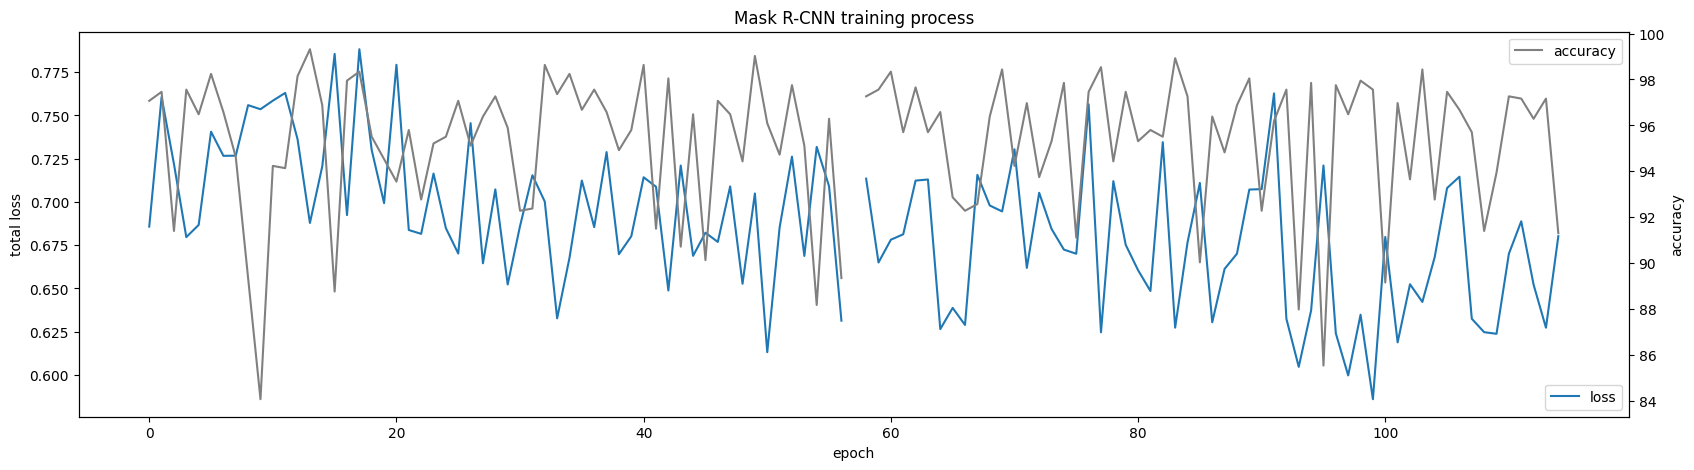

In [9]:
fig, ax = plt.subplots(figsize=(20,5))
ax_t = ax.twinx()
ax.plot(df.loss, label='loss')
ax.set_title('Mask R-CNN training process')
ax.set_ylabel('total loss')
ax.set_xlabel('epoch')
ax_t.set_ylabel('accuracy')
ax_t.plot(df.acc, label='accuracy', color='gray')
ax.legend(loc='lower right')
ax_t.legend(loc='upper right')
plt.show()